In [ ]:
'''
Unsupervised Learning
k-means 
evaluation technique
silhouette scor of single datapoint b(i) inter clsuter a(i) intra'''


In [1]:
!pip install pandas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
# 1) Load the Dataset
data=pd.read_csv('environmental factors.csv')
data.head()

temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  
0        84.723658  
1        49.451704  
2        19.546561  
3        73.664179  
4        41.867814

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       10000 non-null  float64
 1   humidity          10000 non-null  float64
 2   wind_speed        10000 non-null  float64
 3   carbon_emissions  10000 non-null  float64
 4   solar_irradiance  10000 non-null  float64
 5   pollution_level   10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [6]:
data.isnull().sum()

temperature         0
humidity            0
wind_speed          0
carbon_emissions    0
solar_irradiance    0
pollution_level     0
dtype: int64

C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

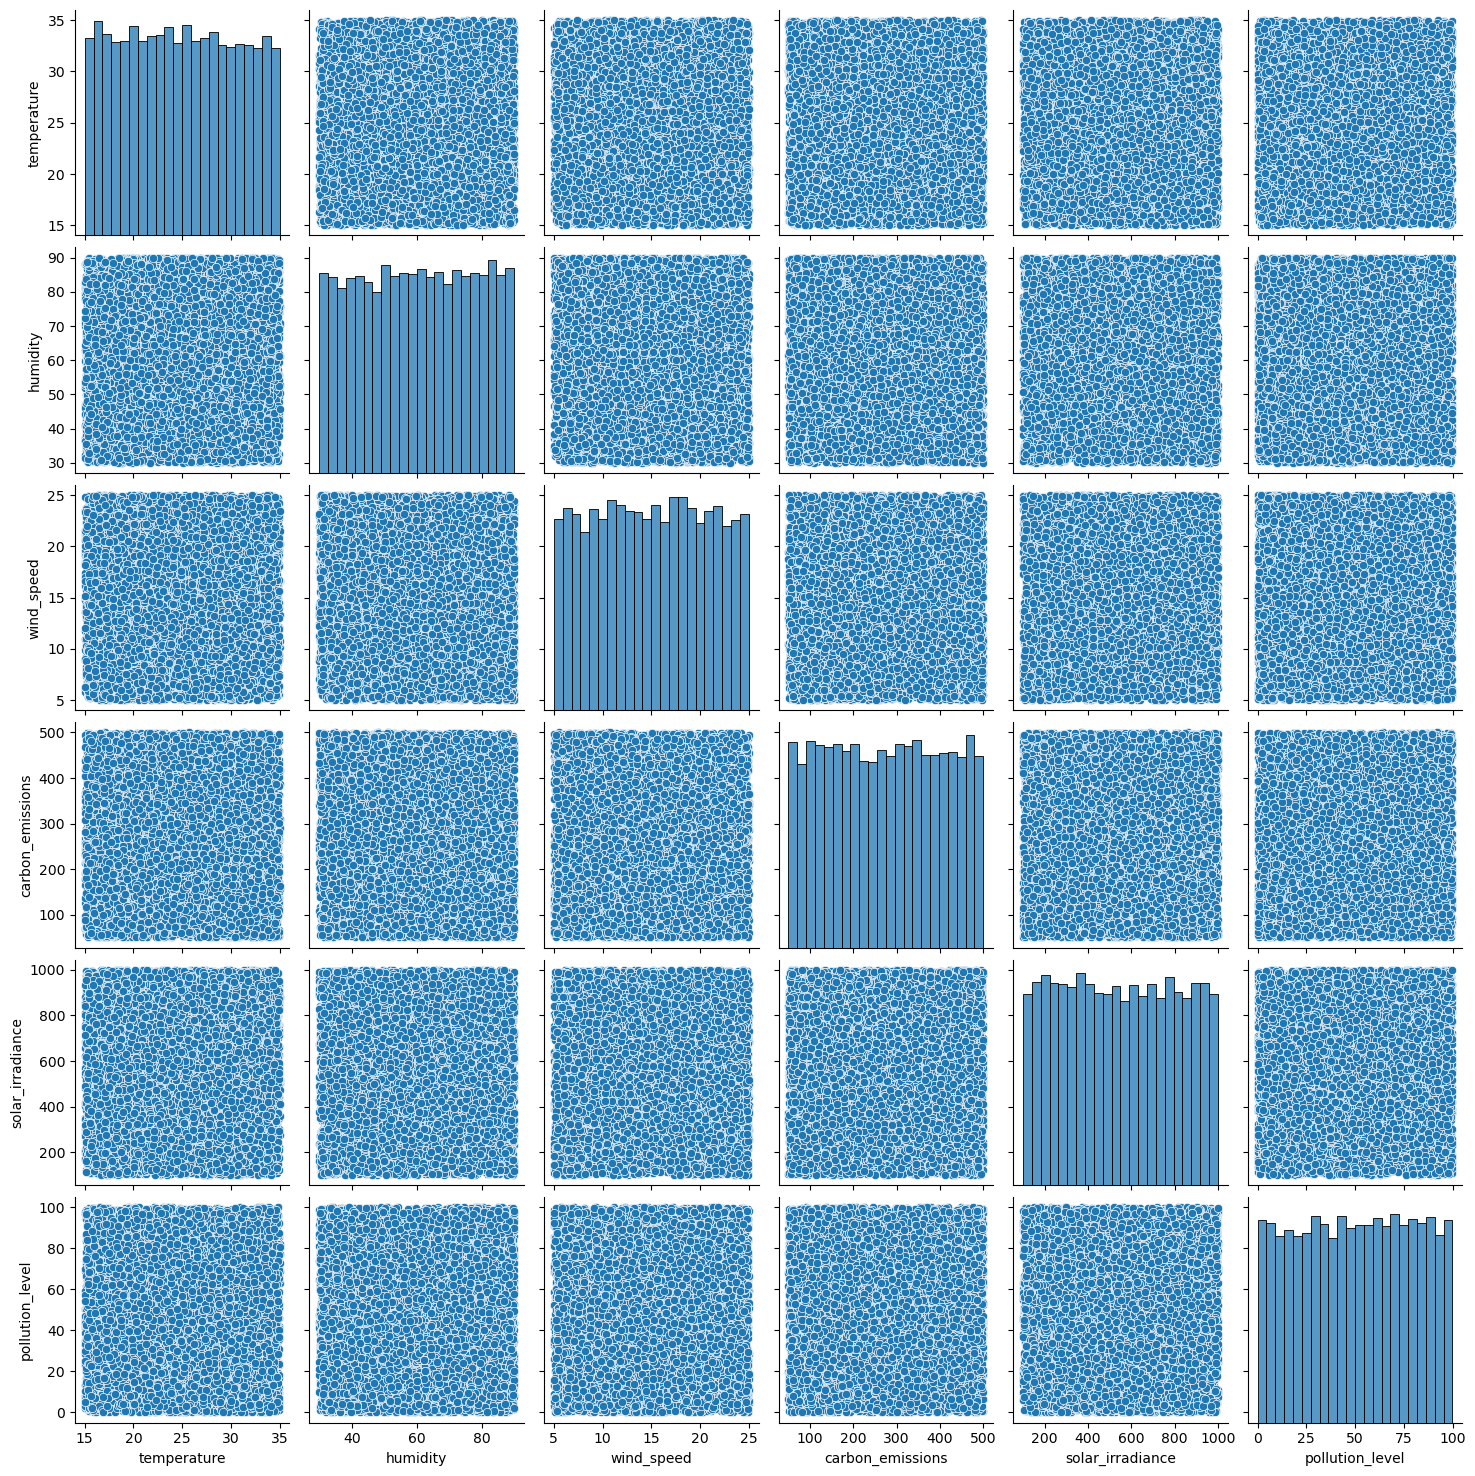

In [8]:
sns.pairplot(data)
plt.show()

C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

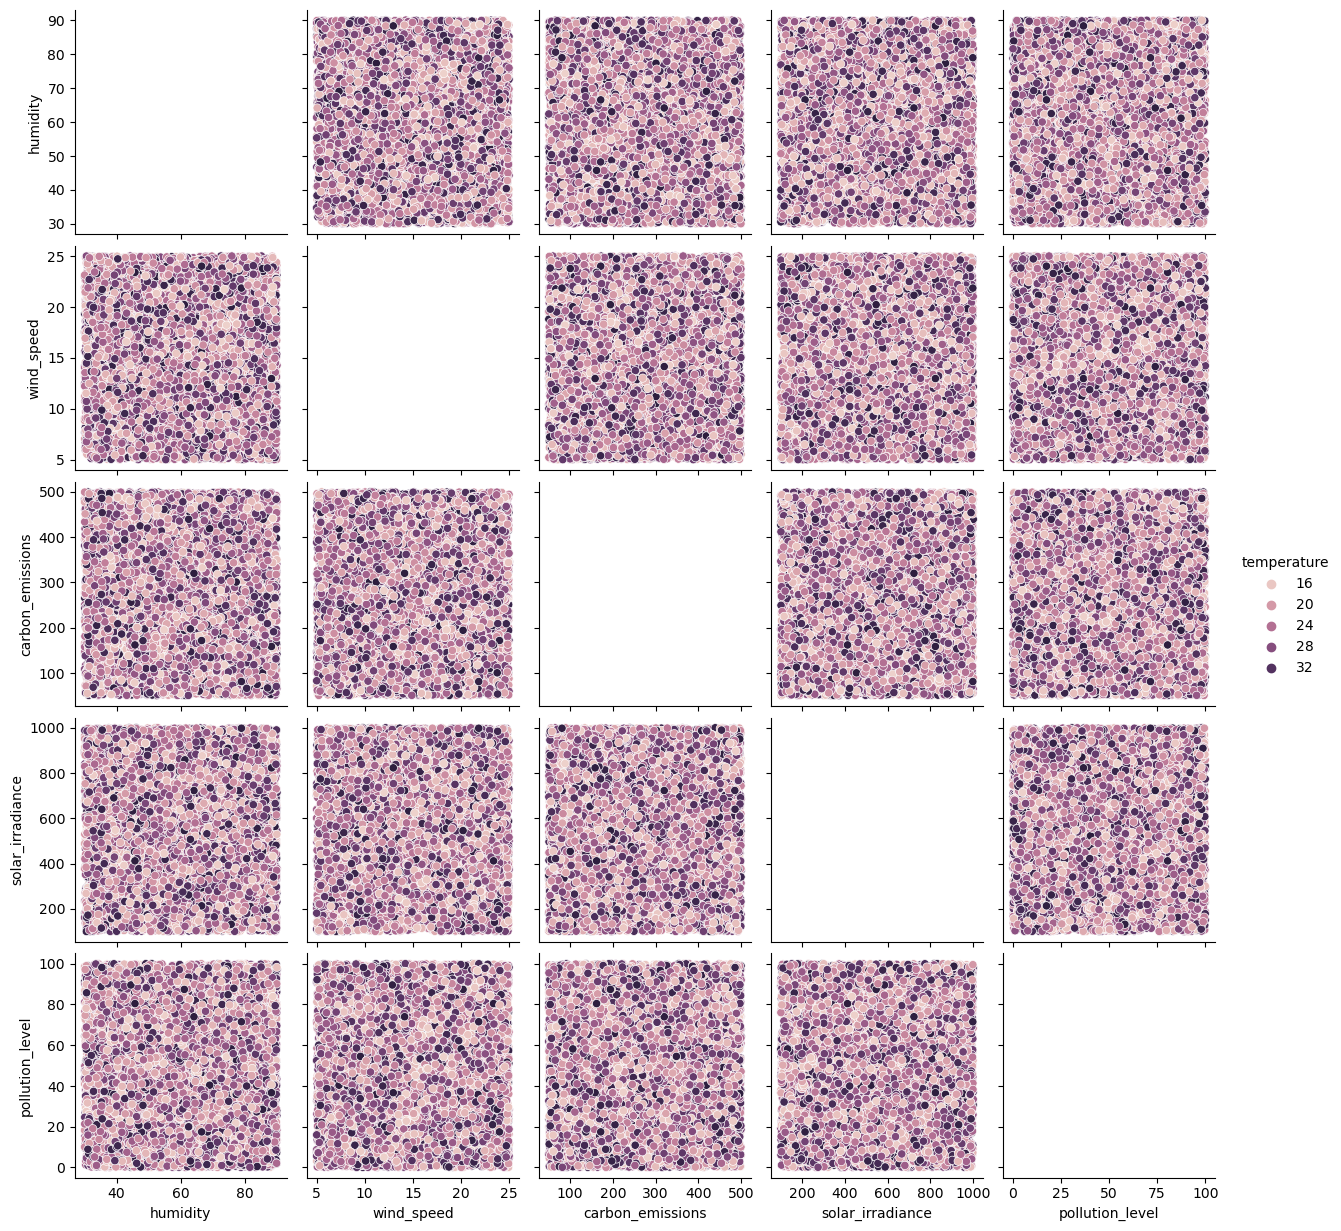

In [9]:
sns.pairplot(data, hue='temperature')
plt.show()

In [12]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
pd.DataFrame(data_scaled,columns=data.columns).head()

temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level  
0         1.193409  
1        -0.029923  
2        -1.067119  
3         0.809835  
4        -0.292954

C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swapnil\anaconda3\Lib\site-packages\skl

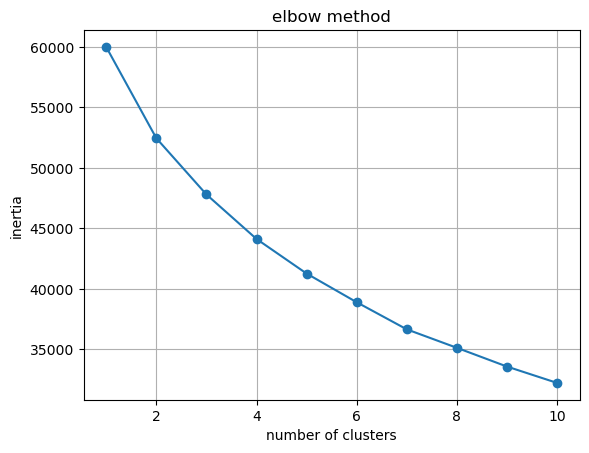

In [14]:
inertia=[]
k_range=range(1,11)

for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

#plt the inertia values to find the 'elbow' point

plt.plot(k_range,inertia,marker='o')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.grid()
plt.show()

In [16]:
k=6
kmeans=KMeans(n_clusters=k, random_state=42)
data['cluster']=kmeans.fit_predict(data_scaled)

data.head()

C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  cluster  
0        84.723658        3  
1        49.451704        4  
2        19.546561        4  
3        73.664179        3  
4        41.867814        4

In [19]:
# Calculate Silhouette Score
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f"The silhouette score is : {sil_score}")   #score value is closed to 0 ==> overlapped cluster

The silhouette score is : 0.1210849526258857


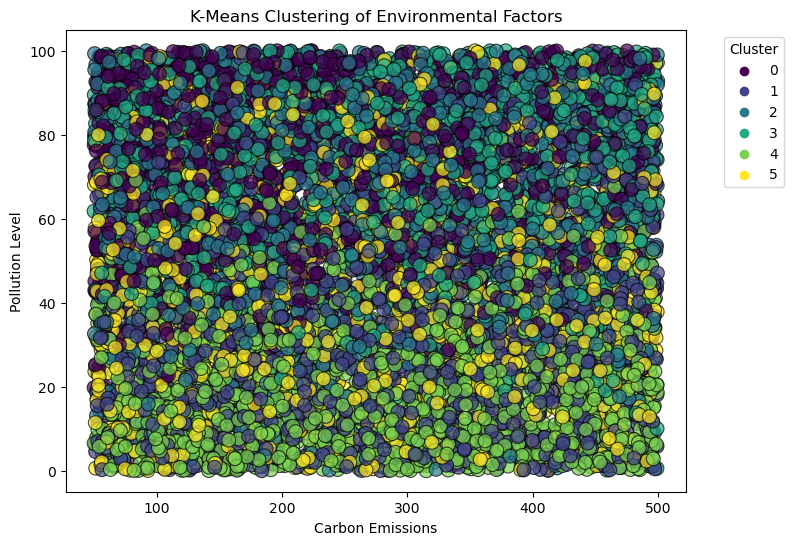

In [20]:
# Create a scatter plot with the cluster labels
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='carbon_emissions', y='pollution_level', hue='cluster', 
                data=data, palette='viridis', s=100, alpha=0.7, edgecolor='k')

plt.title('K-Means Clustering of Environmental Factors')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

MALL CUSTOMER

In [55]:
# 1) Load the Dataset
df=pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

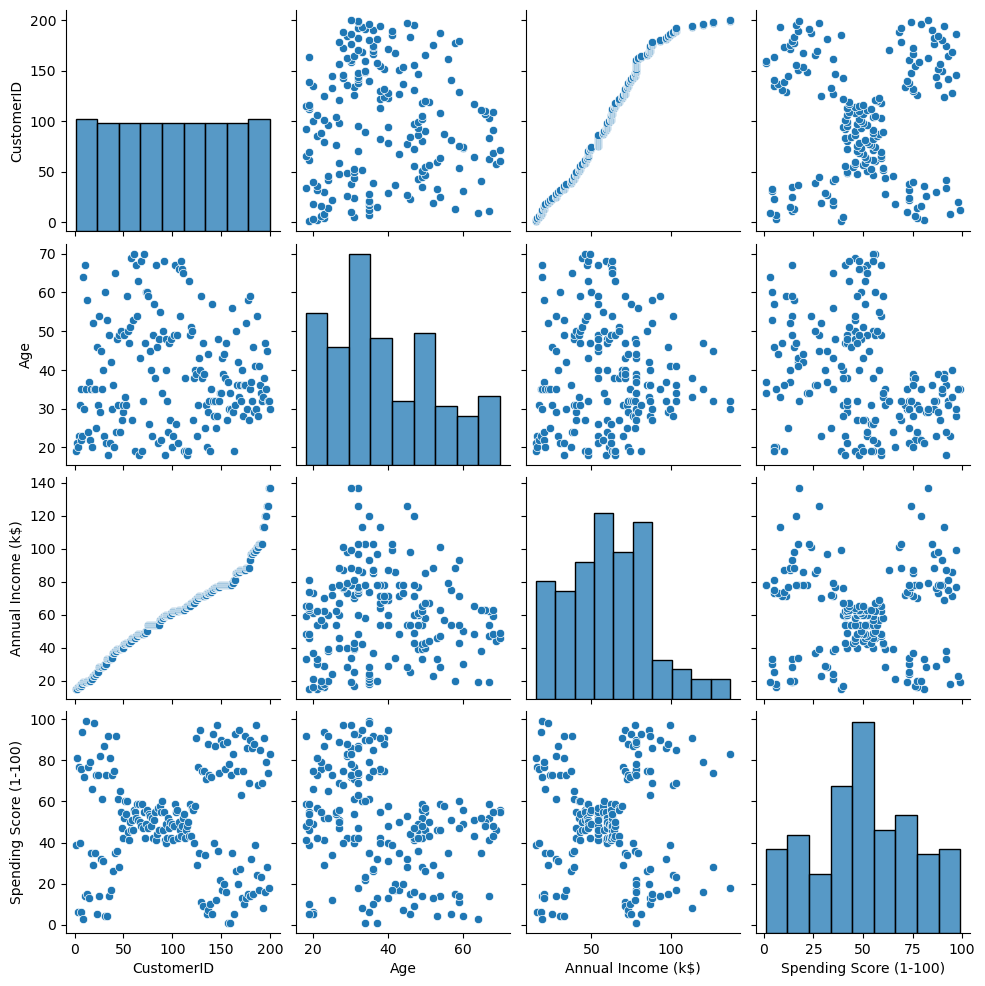

In [58]:
sns.pairplot(df)
plt.show()

In [61]:
df=df.drop('Gender',axis=1)

In [62]:
df.head()

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   19                  15                      39
1           2   21                  15                      81
2           3   20                  16                       6
3           4   23                  16                      77
4           5   31                  17                      40

In [63]:
scaler=StandardScaler()
d_f=scaler.fit_transform(df)

C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

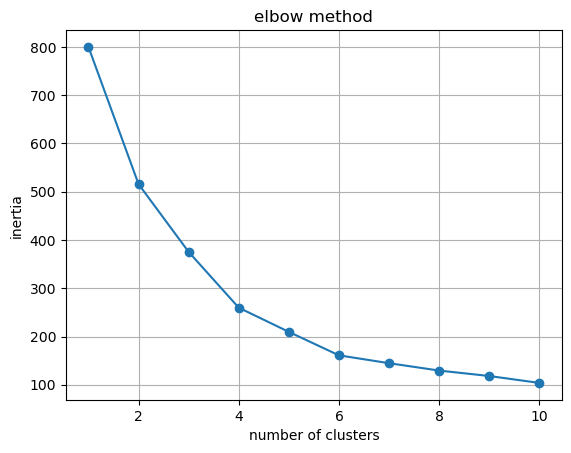

In [64]:
inertia=[]
k_range=range(1,11)

for k_n in k_range:
    kmeans=KMeans(n_clusters=k_n, random_state=42)
    kmeans.fit(d_f)
    inertia.append(kmeans.inertia_)

#plt the inertia values to find the 'elbow' point

plt.plot(k_range,inertia,marker='o')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.grid()
plt.show()

In [65]:
k_n=6
kmeans=KMeans(n_clusters=k_n, random_state=42)
df['cluster']=kmeans.fit_predict(d_f)

df.head()

C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0           1   19                  15                      39        1
1           2   21                  15                      81        1
2           3   20                  16                       6        3
3           4   23                  16                      77        1
4           5   31                  17                      40        3

In [66]:
# Calculate Silhouette Score
sil_score_1= silhouette_score(d_f, df['cluster'])
print(f"The silhouette score is : {sil_score_1}")   #score value is closed to 0 ==> overlapped cluster

The silhouette score is : 0.4390404164555763


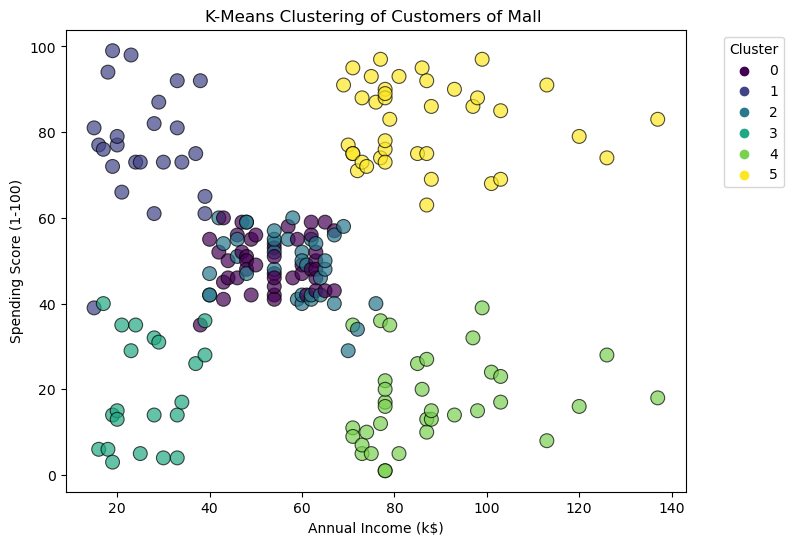

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', 
                data=df, palette='viridis', s=100, alpha=0.7, edgecolor='k')

plt.title('K-Means Clustering of Customers of Mall ')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [72]:
print(df.columns)


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')
